In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

from matplotlib import rcParams
import colorcet as cc

rcParams.update({
    "text.usetex": True,
})

In [2]:
PTEX_dissim = np.loadtxt("../data/PTEX_DTW_matrix.dat", dtype= np.float32, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex = True, figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SC, CH, DB = zip(*tuple(metrics_by_num.values()))
    subplots_colors = ("red", "blue", "green")

    maximum_SC_coeff = np.argmax(SC)
    maximum_CH_index = np.argmax(CH)
    minimum_DB_index = np.argmin(DB)
    print("Number of clusters given by maximum SC score: ", num_clusters[maximum_SC_coeff])
    print("Number of clusters given by maximum CH score: ", num_clusters[maximum_CH_index])
    print("Number of clusters given by minimum DB score: ", num_clusters[minimum_DB_index])

    Subplot[0].plot(num_clusters, SC, "-o", color = subplots_colors[0])
    Subplot[1].plot(num_clusters, CH, "-o", color = subplots_colors[1])
    Subplot[2].plot(num_clusters, DB, "-o", color = subplots_colors[2])

    Subplot[2].set_xlabel("No. of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 100
num_reps = 100
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEX_dissim, K = k, iter = num_iters, reps = num_reps)
    BestSYNCLUS = SYNCLUS_VTEC.fit_predict()
    Metrics = GetClusteringMetrics(PTEX_dissim, BestSYNCLUS["end_clusters"])

    metrics_by_clusters[k] = Metrics

100%|██████████| 100/100 [00:33<00:00,  2.96it/s]


Best SYNCLUS model at index 7 with EP = 228378.979258  for 2 clusters


100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


Best SYNCLUS model at index 2 with EP = 128290.863777  for 3 clusters


100%|██████████| 100/100 [01:14<00:00,  1.35it/s]


Best SYNCLUS model at index 22 with EP = 114589.836978  for 4 clusters


100%|██████████| 100/100 [01:49<00:00,  1.10s/it]


Best SYNCLUS model at index 30 with EP = 101932.735867  for 5 clusters


100%|██████████| 100/100 [02:02<00:00,  1.23s/it]


Best SYNCLUS model at index 52 with EP = 92382.849826  for 6 clusters


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


Best SYNCLUS model at index 40 with EP = 87909.816644  for 7 clusters


100%|██████████| 100/100 [02:23<00:00,  1.44s/it]


Best SYNCLUS model at index 63 with EP = 83810.760202  for 8 clusters


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


Best SYNCLUS model at index 7 with EP = 80610.015664  for 9 clusters


100%|██████████| 100/100 [03:20<00:00,  2.00s/it]


Best SYNCLUS model at index 86 with EP = 77291.112614  for 10 clusters


Number of clusters given by maximum SC score:  3
Number of clusters given by maximum CH score:  2
Number of clusters given by minimum DB score:  2


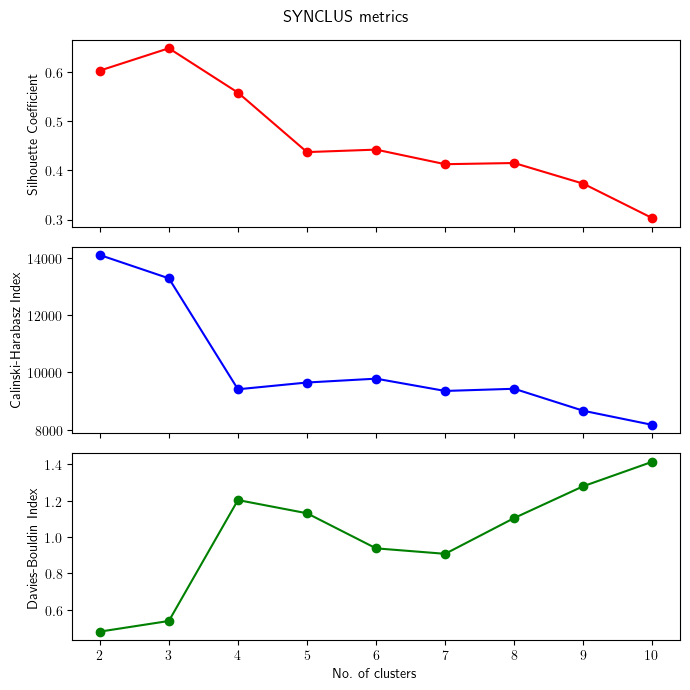

In [6]:
VisualizeClusterMetrics(metrics_by_clusters)

In [9]:
BestLabelsSYNCLUS = SYNCLUS(PTEX_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("../data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:44<00:00,  2.25it/s]

Best SYNCLUS model at index 8 with EP = 128290.863777  for 3 clusters
